<a href="https://colab.research.google.com/github/habtamuadargaso/Python-for-Data-Science-/blob/main/Analyzing_Police_Activity_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('police.csv')

# Examine the head of the DataFrame
print(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum)

In [ ]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name','state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

In [ ]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

In [ ]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype(bool)

# Check the data type of 'is_arrested' 
print(ri['is_arrested'].dtype)

In [ ]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time,sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

#Setting the index
The last step that you'll take in this chapter is to set the stop_datetime column as the DataFrame's index. By replacing the default index with a DatetimeIndex, you'll make it easier to analyze the dataset by date and time, which will come in handy later in the course!

In [ ]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)


# Examining traffic violations
Before comparing the violations being committed by each gender, you should examine the violations committed by all drivers to get a baseline understanding of the data. In this exercise, you'll count the unique values in the violation column, and then separately express those counts as proportions.

In [ ]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

# Comparing violations by gender
The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

In this exercise, you'll first create a DataFrame for each gender, and then analyze the violations in each DataFrame separately.

In [ ]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize = True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize = True))

Which one of these commands would filter the ri DataFrame to only include female drivers who were stopped for a speeding violation?

In [ ]:

#A. ri[(ri.driver_gender = 'F') & (ri.violation = 'Speeding')]


#B.  ri[ri.driver_gender == 'F' & ri.violation == 'Speeding']


#C. ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]


#D.  ri[(ri.driver_gender == 'F') | (ri.violation == 'Speeding')]

# E. ri[(ri.driver_gender == 'F') and (ri.violation == 'Speeding')]

# answer = C 


# Comparing speeding outcomes by gender
When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can you find evidence of this in the dataset?

First, you'll create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males.

Then, for each gender, you'll use the stop_outcome column to calculate what percentage of stops resulted in a "Citation" (meaning a ticket) versus a "Warning"

In [ ]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') &(ri.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize = True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize = True))

# Calculating the search rate
During a traffic stop, the police officer sometimes conducts a search of the vehicle. In this exercise, you'll calculate the percentage of all stops in the ri DataFrame that result in a vehicle search, also known as the search rate.

In [ ]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize = True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

# Comparing search rates by gender
In this exercise, you'll compare the rates at which female and male drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about 3.8%.

First, you'll filter the DataFrame by gender and calculate the search rate for each group separately. Then, you'll perform the same calculation for both genders at once using a .groupby().



In [ ]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender=='F'].search_conducted.mean())

# Comparing search rates by gender
In this exercise, you'll compare the rates at which female and male drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about 3.8%.

First, you'll filter the DataFrame by gender and calculate the search rate for each group separately. Then, you'll perform the same calculation for both genders at once using a .groupby().

In [ ]:
# Calculate the search rate for male drivers
print(ri[ri.driver_gender == 'M'].search_conducted.mean())

In [ ]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

# Adding a second factor to the analysis
Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Let's find out if that's the case!

In [ ]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean())
# print(ri.groupby(['violation','driver_gender']).search_conducted.mean())

# Counting protective frisks
During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

In this exercise, you'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked

In [ ]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'

print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())


# Comparing frisk rates by gender
In this exercise, you'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the DataFrame to only include the relevant subset of data, namely stops in which a search was conducted.

In [ ]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

# Calculating the hourly arrest rate
When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops in the ri DataFrame. Then, you'll calculate the hourly arrest rate by using the hour attribute of the index. The hour ranges from 0 to 23, in which:

0 = midnight
12 = noon
23 = 11 PM

In [ ]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

# Plotting the hourly arrest rate
In this exercise, you'll create a line plot from the hourly_arrest_rate object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

In [ ]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()


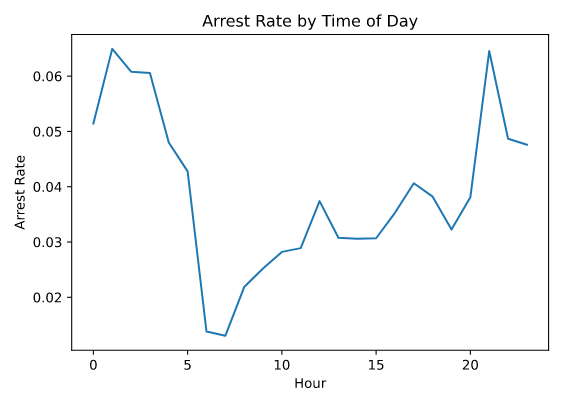

To visualize the relationship between price and volume, we simply call the plot() method on the monthly DataFrame. pandas outputs a single line plot in which each line represents one of the two columns. Because it's a single plot, the two lines are sharing both the x and y axes. It makes sense for the x-axis to be shared, since we want to compare price and volume by month. But sharing the y-axis is problematic, because price and volume are on such different scales: price is in the hundreds, and volume is in the tens of millions, represented by the 1e7 notation at the top of the y-axis. Because of the different scales, we can't actually see the price trend.

The solution to this problem is to set the subplots parameter to True, which results in two separate plots with independent y axes. Now we can clearly see the monthly trends for both price and volume. They appear to have an inverse relationship, though we wouldn't actually draw that conclusion without having a lot more data

#Plotting drug-related stops
In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The Boolean column drugs_related_stop indicates whether drugs were found during a given stop. You'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over time.

In [ ]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'

annual_drug_rate.plot()
# Display the plot
plt.show()

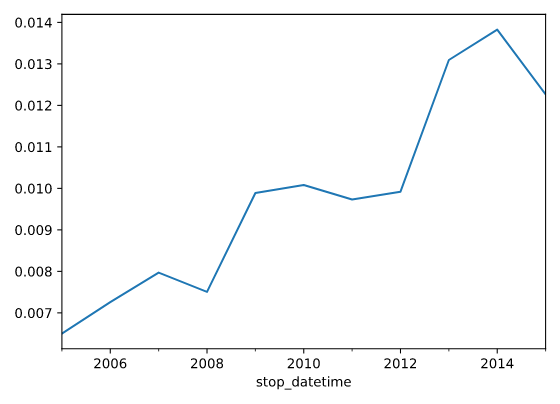

#Comparing drug and search rates

As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

In [ ]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots = True)

# Display the subplots
plt.show()

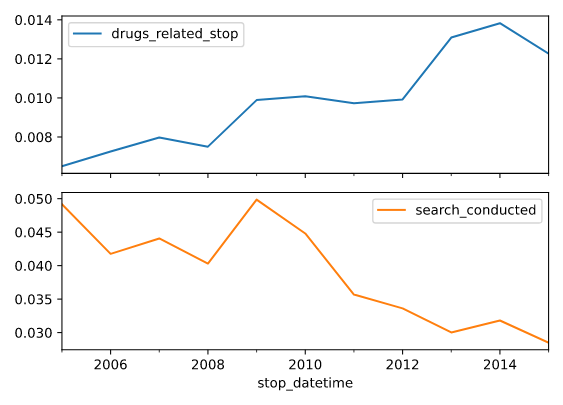

4. Creating a line plot
If we plot the table object, we'll get a line plot by default, in which the index is along the x-axis and each column becomes a line. However, a line plot is not appropriate in this case because it implies a change in time along the x-axis, whereas the x-axis actually represents three distinct categories.

5. Creating a bar plot
By specifying kind equals bar, you can create a bar plot, which is much more appropriate than a line plot for comparing categorical data. With this plot, the numbers in our frequency table have been converted to bars for which the height represents the magnitude. Each gender has been assigned a color, and the two gender bars for each race are placed next to one another. The bar plot makes it especially easy to see the gender difference within each race. For all three races, we see that the number of males stopped is far greater than the number of females stopped



5. A variation of the bar plot is the stacked bar plot, which you can generate by adding the argument stacked equals True. For each race, the two gender bars are now stacked on top of one another. The strength of this plot is that it helps you to see the total stops for each race, which was not as obvious when the bars were side-by-side. By emphasizing the totals, however, this plot slightly deemphasizes the individual components of each bar, and makes those components harder to compare against one another. Neither type of bar plot is right or wrong, rather you should choose the plot that best helps to answer the question you're asking.

# Tallying violations by district
The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the "K" zones, which you'll examine further in the next exercise.

In [ ]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

# Plotting violations by district
Now that you've created a frequency table focused on the "K" zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a bar plot, which is an appropriate plot type since you're comparing categorical data. Then you'll create a stacked bar plot in order to get a slightly different look at the data. Which plot do you find to be more insightful?

In [ ]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

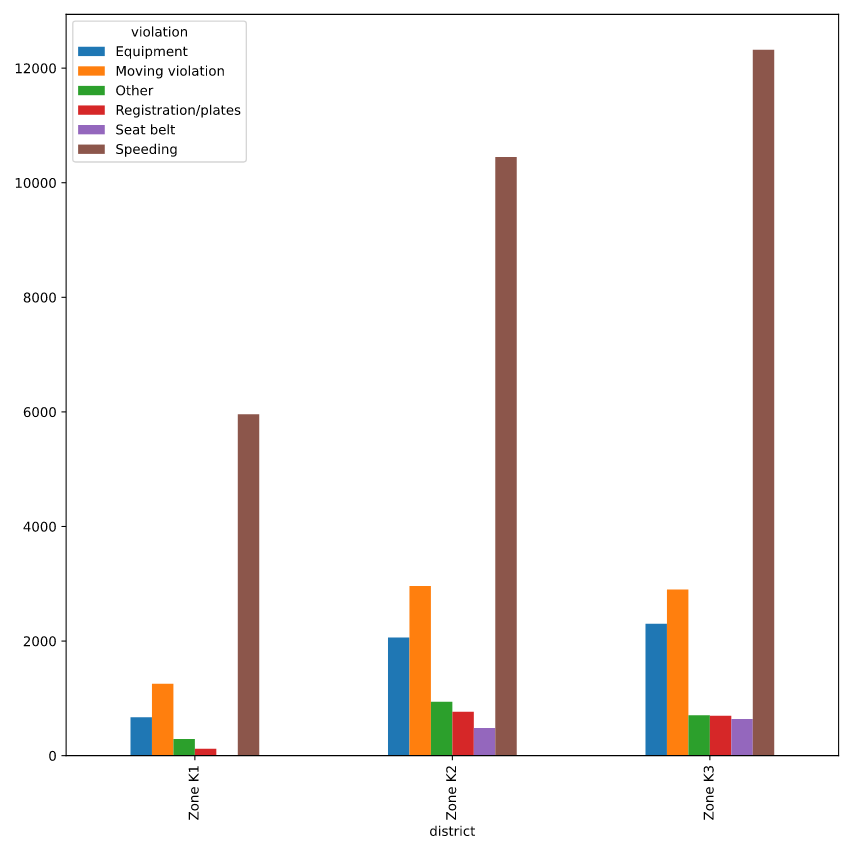

In [ ]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar',stacked=True)

# Display the plot
plt.show()

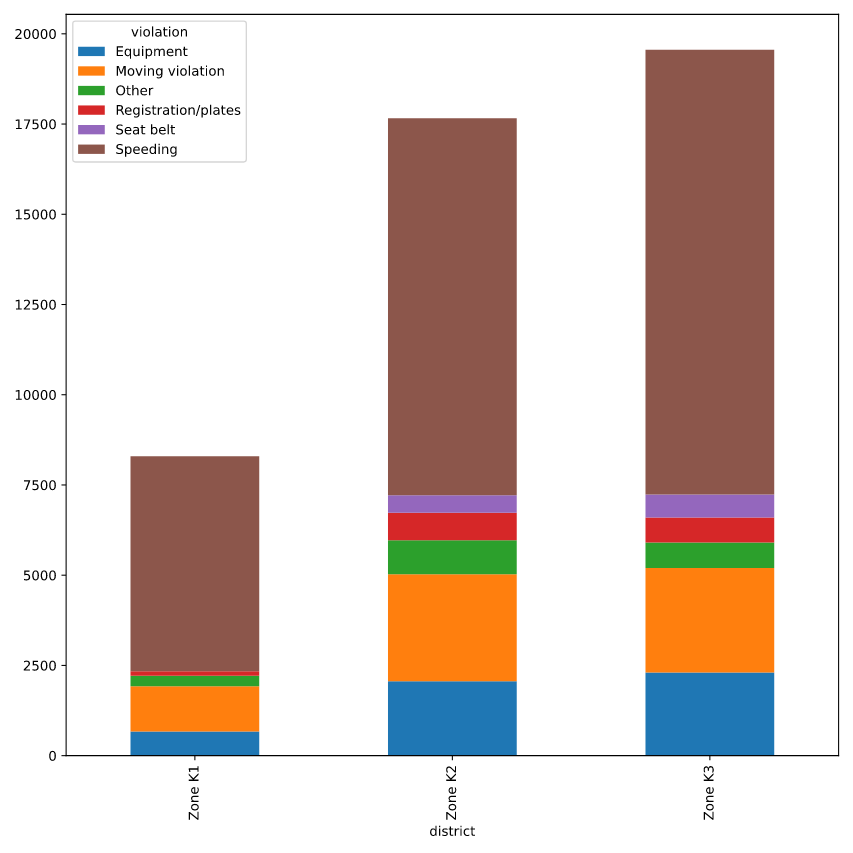

Converting stop durations to numbers
In the traffic stops dataset, the stop_duration column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. How can you make this data easier to analyze?

In this exercise, you'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

Convert '0-15 Min' to 8
Convert '16-30 Min' to 23
Convert '30+ Min' to 45

In [ ]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8,'16-30 Min':23,'30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

# Plotting stop length
If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the violation column in this exercise, you'll use violation_raw since it contains more detailed descriptions of the violations.

In [ ]:
 # Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

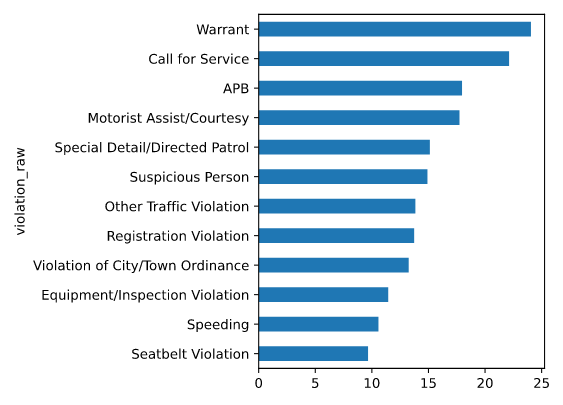

In [ ]:

# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('weather.csv')

# Describe the temperature columns
print(weather[['TMIN','TAVG','TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN','TAVG','TMAX']].plot(kind='box')

# Display the plot
plt.show()

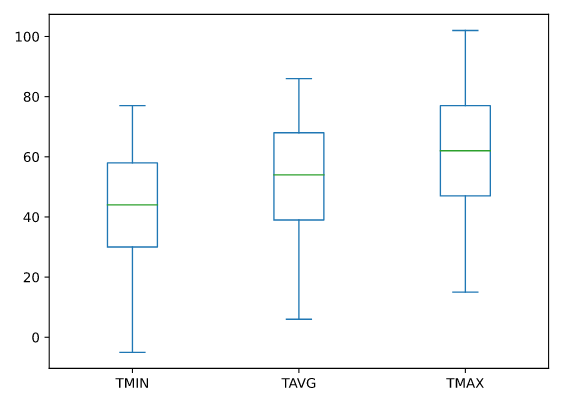

# Plotting the temperature difference
In this exercise, you'll continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

What do you notice about the resulting histogram? Does it match your expectations, or do you see anything unusual?

In [ ]:

# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN


# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist',bins=20)

# Display the plot
plt.show()

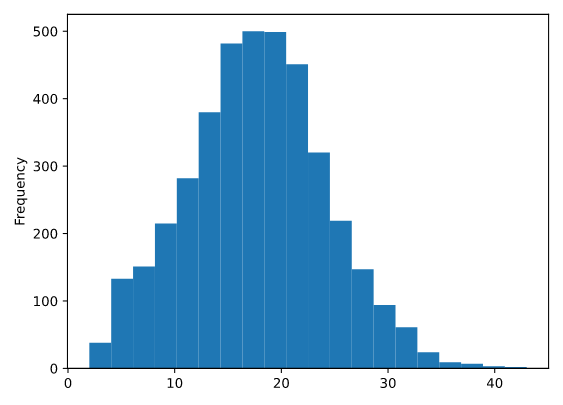

# Counting bad weather conditions
The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

WT05 indicates "Hail"
WT11 indicates "High or damaging winds"
WT17 indicates "Freezing rain"
For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

In this exercise, you'll quantify "how bad" the weather was each day by counting the number of 1 values in each row.

In [ ]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis = 'columns' )

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'

weather.bad_conditions.plot(kind='hist',bins=20)

# Display the plot
plt.show()

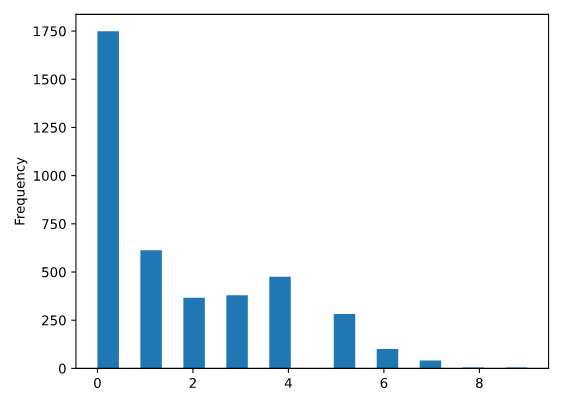

Rating the weather conditions
In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a rating system for the weather.

The counts range from 0 to 9, and should be converted to ratings as follows:

Convert 0 to 'good'
Convert 1 through 4 to 'bad'
Convert 5 through 9 to 'worse'

In [ ]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}


# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())


# Changing the data type to category
Since the rating column only has a few possible values, you'll change its data type to category in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

In [ ]:
# Specify the logical order of the weather ratings
cats = pd.CategoricalDtype(['good', 'bad', 'worse'], ordered=True)

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(cats)

# Examine the head of 'rating'
print(weather.rating.head())

# Preparing the DataFrames

In this exercise, you'll prepare the traffic stop and weather rating DataFrames so that they're ready to be merged:

With the ri DataFrame, you'll move the stop_datetime index to a column since the index will be lost during the merge.
With the weather DataFrame, you'll select the DATE and rating columns and put them in a new DataFrame.

In [ ]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating=weather[['DATE' ,'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

#Merging the DataFrames

In this exercise, you'll merge the ri and weather_rating DataFrames into a new DataFrame, ri_weather.

The DataFrames will be joined using the stop_date column from ri and the DATE column from weather_rating. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set stop_datetime as the index, which is the column you saved in the previous exercise.

In [ ]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')
# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

# Comparing arrest rates by weather rating
Do police officers arrest drivers more often when the weather is bad? Let's find out!

First, you'll calculate the overall arrest rate.
Then, you'll calculate the arrest rate for each of the weather ratings you previously assigned.
Finally, you'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.
Since you previously defined a logical order for the weather categories, good < bad < worse, they will be sorted that way in the results.

In [ ]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

In [ ]:
# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())


In [ ]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation','rating']).is_arrested.mean())

# Selecting from a multi-indexed Series
The output of a single .groupby() operation on multiple columns is a Series with a MultiIndex. Working with this type of object is similar to working with a DataFrame:

The outer index level is like the DataFrame rows.
The inner index level is like the DataFrame columns.
In this exercise, you'll practice accessing data from a multi-indexed Series using the .loc[] accesso

In [ ]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation','bad'])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

# Reshaping the arrest rate data
In this exercise, you'll start by reshaping the arrest_rate Series into a DataFrame. This is a useful step when working with any multi-indexed Series, since it enables you to access the full range of DataFrame methods.

Then, you'll create the exact same DataFrame using a pivot table. This is a great example of how pandas often gives you more than one way to reach the same result!

In [ ]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))